# Brownian Motion (Wiener Process)

A **Brownian motion**, or **Wiener process**, $W_t$ is a fundamental continuous-time Gaussian process with these properties:

1. **Initial condition**  

   $W_0 = 0$.


2. **Independent increments**  
   For any $0 \le t_1 < t_2 < \cdots < t_n$, the increments $W_{t_2} - W_{t_1},\; W_{t_3} - W_{t_2},\;\dots,\; W_{t_n} - W_{t_{n-1}}$ are mutually independent.

3. **Stationary, Gaussian increments**  
   Each increment over an interval of length $\Delta t$ is normally distributed: $W_{t+\Delta t} - W_t \;\sim\; \mathcal{N}\bigl(0,\;\Delta t\bigr)$.

4. **Continuous paths**  
   With probability 1, $t \mapsto W_t$ is continuous in $t$.


### Infinitesimal increment

The differential $ dW_t \;=\; W_{t + dt} - W_t$ satisfies, $dW_t \;\sim\; \mathcal{N}\bigl(0,\,dt\bigr)$, so that:
- $\mathbb{E}[\,dW_t\,] = 0,$
- $\mathrm{Var}(dW_t) = dt.$



### Distribution of $W_t$

At any fixed time $t$, the process has $  W_t \;\sim\; \mathcal{N}\bigl(0,\,t\bigr)$.



> **Note:** Sometimes a constant volatility parameter $\sigma$ is introduced by defining $X_t = \sigma\,W_t$, in which case  
> $\mathrm{Var}(X_t) = \sigma^2\,t$.


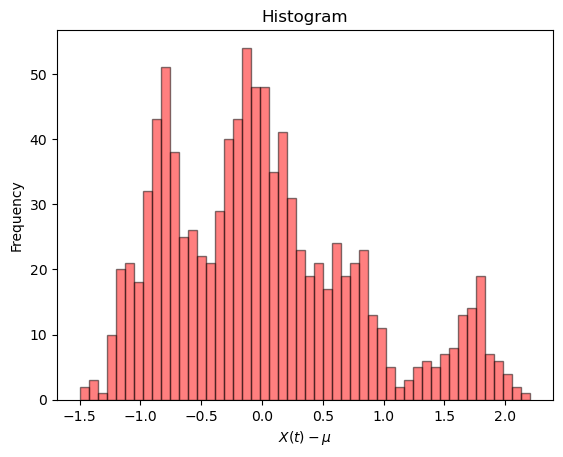

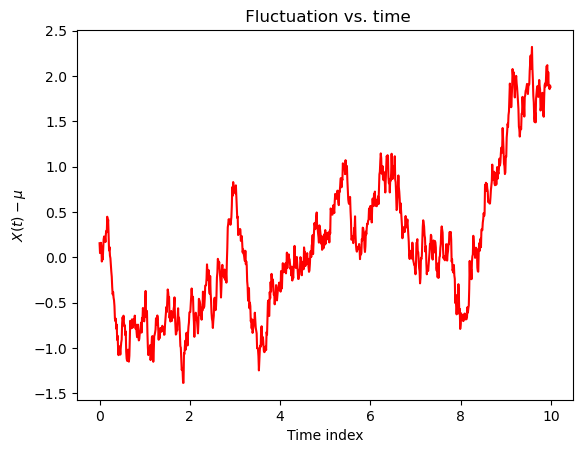

In [30]:
#Brownnian motion
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000 # number of steps
dt = 0.01    # time increment
t = np.arange(n) * dt

# Simulate Gaussian increments for 2D Brownian motion
dx = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=n)
xt = np.cumsum(dx)#cumulative sum

# Histogram of radial distances
plt.figure()
plt.hist((xt - np.mean(xt)),
         bins=50, color='red',
         alpha = 0.5, 
         edgecolor='black', 
         linewidth=1)
plt.xlabel(r'$X(t) - \mu$')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

#Displacement distance over time
plt.figure()
plt.plot(t, xt, color = 'red')
plt.xlabel('Time index')
plt.ylabel(r'$X(t) - \mu$')
plt.title(' Stock price vs. time')
plt.show()


# Geometric Browninan Motion

We model the evolution of a stock price $S_t$ by the stochastic differential equation  

$dS_t = \mu\,S_t\,dt \;+\;\sigma\,S_t\,dW_t$,

where  
- $\mu\,S_t\,dt$ is the **drift** component (expected instantaneous return),  
- $\sigma\,S_t\,dW_t$ is the **diffusion** or **volatility** component, driven by a standard Brownian increment $dW_t$.  

One can show that this SDE has the closed-form solution  

$S_t = S_0\,\exp\bigl(x_t\bigr)$,  
with  

$x_t = \Bigl(\mu - \tfrac{1}{2}\sigma^2\Bigr)t \;+\;\sigma\,W_t$,

so that on a logarithmic scale the process is an arithmetic Brownian motion with drift $\mu - \tfrac12\sigma^2$ and volatility $\sigma$.  



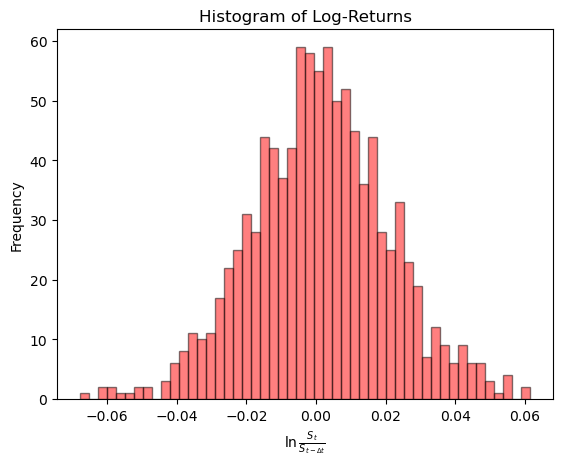

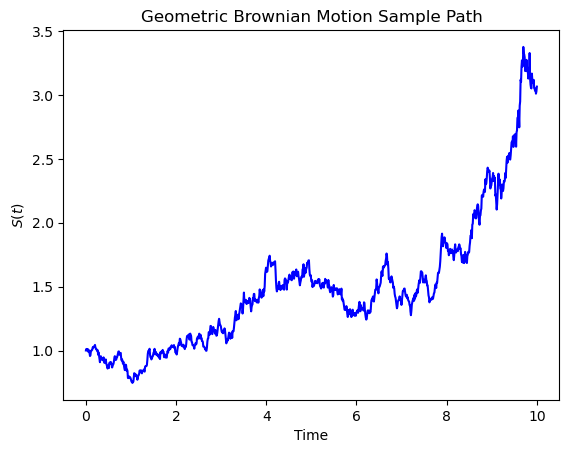

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Ensure built-in mathtext (not full LaTeX) is used
mpl.rcParams['text.usetex'] = False

# Parameters for Geometric Brownian Motion
n = 1000          # number of steps
dt = 0.01         # time increment (so total T = n*dt = 10)
mu = 0.1          # drift coefficient
sigma = 0.2       # volatility coefficient
S0 = 1.0          # initial value

# Time vector
t = np.linspace(0, n*dt, n)

# Simulate Wiener process (Brownian increments)
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=n-1)
W = np.concatenate(([0], np.cumsum(dW)))

# Geometric Brownian motion path
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# Histogram of log-returns
log_returns = np.diff(np.log(S))

plt.figure()
plt.hist(
    log_returns,
    bins=50,
    color='red',
    alpha=0.5,
    edgecolor='black',
    linewidth=1
)
plt.xlabel(r'$\ln\frac{S_{t}}{S_{t-\Delta t}}$')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Returns')
plt.show()

# Trajectory of S(t)
plt.figure()
plt.plot(t, S, color='blue')
plt.xlabel('Time')
plt.ylabel(r'$S(t)$')
plt.title('Stock price vs time')
plt.show()
